![](https://miro.medium.com/max/691/0*xXUYOs5MWWenxoNz)

# Знакомство с PyTorch

**PyTorch** -- это фреймворк для машинного обучения для языка Python с открытым исходным кодом, разрабатываемый под покровительством Facebook.  

Используется для решения различных задач в области компьютерного зрения, обработки естественного языка и т. д.  

Первый релиз PyTorch вышел в 2016 году, и с тех пор он занимает прочную нишу в области глубокого обучения.  

Как утверждает [документация](https://pytorch.org/docs/stable/index.html) по PyTorch, он является науно-вычислительным пакетом, который предоставляет следующие возможности:
* тензорные вычисления с возможностью распараллеливания их на GPU (имеется поддержка множества GPU)  
* развитые алгоритмы глубокого обучения, обеспечивающие максимальную гибкость и скорость выполнения

Вокруг PyTorch за время его существования выстроилась целая экосистема, состоящая из различных смежных по области применения библиотек: Fast.ai (создана для упрощения создания моделей), Flair (для обработки естественного языка и т. д.)  

В первую очередь, PyTorch фокусируется на простоте использования и позволяет пользователям с базовыми навыками программирования создавать свои проекты по глубокому обучению. Это возможно благодаря тому, что он поддерживает питонский стиль написания кода. 

Также явным преимуществом PyTorch перед другими фреймворками является простота отладки.  
В процессе отладки модели, написанных на других фреймворках, не всегда понятно, что пошло не так. 
Также PyTorch тесно интегрирован с Python и основыми библиотеками для Data Science для него: NumPy, SciPy и т. д.  

Скрость выполнения алгоритмов глубокого обучения на PyTorch обеспечивает высокопроизводительный C++ API 

## PyTorch. Работа с тензорами

Основным объектом PyTorch являются тензоры -- многомерные матрицы, аналогичные таковым в NumPy.  
В контексте PyTorch их применение оправдано тем, что при наличии соотсветствующего программного и аппаратного обеспечения они позволяют ускорить выполнение математических операций. 

In [ ]:
import torch

# пути создания тензоров аналогичны таковым в NumPy
ones_tensor = torch.ones(5) # тензор размерностью 1 длиной 5, заполненный единицами
ones_tensor

tensor([1., 1., 1., 1., 1.])

In [ ]:
zeros_tensor = torch.zeros(3, 3) # тензор размерностьью 3х3, заполненный нулями
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
# поддерживается пользовательский способ задания тензоров
tensor_example = torch.Tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(type(tensor_example))

<class 'torch.Tensor'>


In [ ]:
tensor_example_1 = torch.Tensor([[1, 2, 3, 4], [5, 5, 6, 7], [8, 9, 10, 11]])
tensor_example_1

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
# размерность тензора можно найти с помощью shape
tensor_example_1.shape

torch.Size([3, 4])

In [ ]:
# получение доступа к элементу тензора

t1 = torch.Tensor([4, 5, 12, 33])
print(t1[1])

t2 = torch.rand([3, 5]) # генерация тензора размерностью 3 на 5, заполненного случайными значениями от 0 до 1
print(t2[1][3])

t3 = torch.randint(10, [3, 3, 3])
print(t3[0][1][2])

tensor(5.)
tensor(0.2980)
tensor(2)


In [ ]:
# поддерживаются операции slice

print(t1[1:3])
print(t2[:, 1])
print(t3[:, 0:2, 2:4])

tensor([ 5., 12.])
tensor([0.1482, 0.4419, 0.6800])
tensor([[[7],
         [2]],

        [[4],
         [5]],

        [[0],
         [4]]])


In [ ]:
# PyTorch автоматически определяет тип данных тензора, но его можно переопределить

t1 = torch.Tensor([0.93, 0.77, 0.81])
print(t1.dtype)

t2 = torch.tensor([0.11, 0.24, 0.58], dtype=torch.float64)
print(t2.dtype)

torch.float32
torch.float64


In [ ]:
# тензорами поддерживаются все известные арифметические операции
# также поддерживается вычисление основных элементарных функций

t1 = torch.Tensor([13, 22, 9])
t2 = torch.Tensor([14, 63, 94])

print(t1 + t2)
print(t1 - t2)
print(t1 * t2)
print(t1 / t2)
print("\n")
print(torch.sin(t1))
print(torch.cos(t2))
print(torch.exp(t1 + t2))

tensor([ 27.,  85., 103.])
tensor([ -1., -41., -85.])
tensor([ 182., 1386.,  846.])
tensor([0.9286, 0.3492, 0.0957])


tensor([ 0.4202, -0.0089,  0.4121])
tensor([0.1367, 0.9859, 0.9695])
tensor([5.3205e+11, 8.2230e+36,        inf])


In [ ]:
# имеется возможность переводить в тензоры NumPy-массивы

import numpy as np

numpy_array = np.array([1, 3, 6])
print(numpy_array)
tensor_array = torch.from_numpy(numpy_array)
print(tensor_array)


[1 3 6]
tensor([1, 3, 6])


## PyTorch. Работа с наборами данных

Перед тем как начать разрабатывать проект глубокого обучения, необходимо сперва заручиться данными: тренировочными и тестовыми. 

В PyTorch для работы с данными есть подмодуль `torch.utils.data`, который содержит важный класс `DataLoader`

Также в PyTorch имеется доступ ко многим известным наборам данных, таких, как, например, CIDAR, MNIST и т. д. Их можно получить в подмодуле `torchvision.datasets`  
Полный список датасетов можно получить в документации  

Классы, отвечающие за тот или иной датасет, по своей сути схожи  

Рассмотрим в качестве примера датасет Fashion-MNIST.  
Это аналог датасета MNIST, но он состоит из 70000 изображений одежды разпешением 28х28 пикселей, поделенных на 10 классов  

* 0 -	T-shirt/top
* 1 -	Trouser
* 2 -	Pullover
* 3 -	Dress
* 4 -	Coat
* 5 -	Sandal
* 6 -	Shirt
* 7 -	Sneaker
* 8 -	Bag
* 9 -	Ankle boot

Рассмотрим ключевые параметры конструктора класса `Fashion-MNIST`:
* `root` -- путь, в который будет помещен датасет
* `train` -- принимает `True`, если датасет будет тренировочным, иначе `False`
* `download` -- принимает `True`, если датасет необходимо загрузить. Если датасет уже загружен, то повторно загружаться он не будет  
* `transform` -- принимает объект `Transform`, отвечающий за дополнительные преобразования изображений

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# загрузка тренировочной выборки датасета Fashion-MNIST
train_data = datasets.FashionMNIST(r"\content\FashionMNIST",
                          train=True,
                          download=True,
                          transform = transforms.Compose([transforms.ToTensor()]))

Extracting \content\FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to \content\FashionMNIST/FashionMNIST/raw


Extracting \content\FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to \content\FashionMNIST/FashionMNIST/raw


Extracting \content\FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to \content\FashionMNIST/FashionMNIST/raw


Extracting \content\FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to \content\FashionMNIST/FashionMNIST/raw
Processing...



Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Для того чтобы текущий набор данных можно было использовать при обучении модели, написанной на PyTorch, его нужно привести к объекту `DataLoader`.  

В случае с датасетом Fashion-MNIST это выглядит следующим образом:

In [ ]:
# пример создания DataLoader для датасета Fashion-MNIST
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=10, shuffle=True)
print(type(train_dataloader))

torch.utils.data.dataloader.DataLoader


Конструктор класса `Dataloader` принимает в себя много аргументов, рассмотрим основные из них: 
* `dataset` -- набор данных для DataLoader
* `batch-size` -- размер пакета данных (обычно берется степень двойки)
* `shuffle` -- принимает `True`, если данные должны быть перемешаны, иначе `False`
* `sampler` -- описывает стратегию извлечения экземпляров выборки: последовательно, случайно и т. д. (`shuffle` в этом случае должен быть равен `False`)
* `batch_sampler` -- аналогичен аргументу `sampler`, но для партии данных
* `num_workers` -- количество процессов извлечения данных
* `pin_memory` -- принимает `True`, если необходимо, чтобы загрузчик данных отправлял тензоры в память CUDA (ускоряет обучение), иначе `False`

С наборами данных в PyTorch можно производить различные манипуляции

In [ ]:
# узнать величину датасета
print(len(train_data))
print(len(train_dataloader))

60000
6000


In [ ]:
# вывести метки
print(train_data.targets)
print(len(train_data.targets))

tensor([9, 0, 0,  ..., 3, 0, 5])
60000


In [ ]:
# вывести, сколько представителей каждого класса есть в наборе данных:
print(train_data.targets.bincount())

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


In [ ]:
# можно получить доступ к элементам набора данных

# train_data является итерируемым объектом, поэтому из него можно извлечь итератор с помощью функции iter()
# следующий элемент в итераторе можно получить с помощью функции next()
sample = next(iter(train_data))

# каждый sample содержит в себе тензор изображения предмета одежды и метку класса
print(len(sample))

image = sample[0] # 1 изображение размером 28х28
label = sample[1] # метка класса

print(image.shape) 
print(label)

2
torch.Size([1, 28, 28])
9


In [ ]:
# аналогичный подход работает и с объектом DataLoader, который содержит в себе набор данных

sample_from_dataloader = next(iter(train_dataloader))

images, labels = sample_from_dataloader
print(images.shape)
print(labels)

torch.Size([10, 1, 28, 28])
tensor([8, 0, 5, 1, 5, 0, 1, 4, 1, 7])


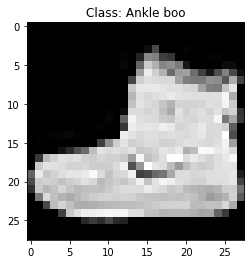

In [ ]:
# отображение элемента набора данных с помощью matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

# словарь классов
classes = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boo"
}

image, label = next(iter(train_data))

# для "отбрасывания" размерности батча вызываем функцию squeeze()
image_squezze = image.squeeze()

# перевод изображения в NumPy-массив для отображения на графике
image_numpy = image_squezze.numpy()



# вывод изображения
plt.imshow(image_numpy, cmap="gray")
plt.title(f"Class: {classes[label]}")
plt.show()

torch.Size([3, 32, 302])


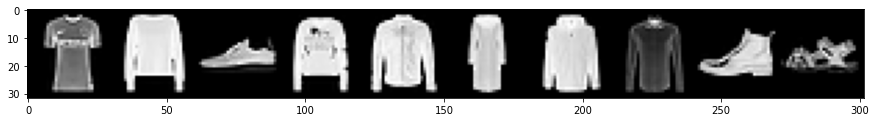

In [ ]:
# отображение небольшого пакета данных с помощью matplotlib

# извлечение батча из DataLoader
images, labels = next(iter(train_dataloader))

# для отображения пакета изображений применим функцию make_grid() из torchvision.utils
from torchvision.utils import make_grid

grid = make_grid(images, nrow=10)
print(grid.shape)
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1,2,0)))

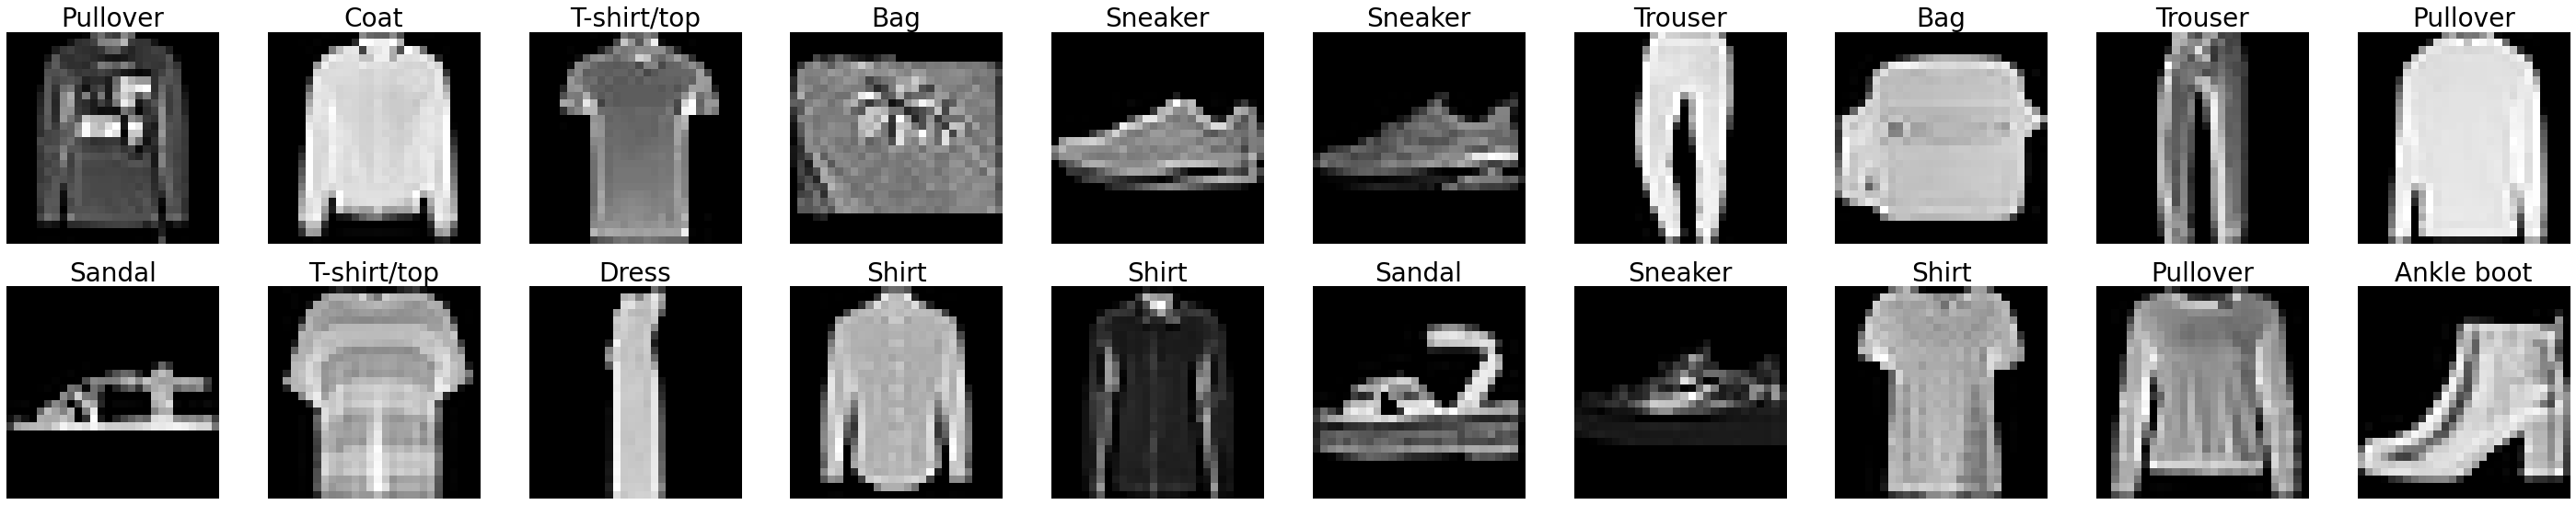

In [ ]:
# отображение элементов в батче используя DataLoader

# количество отображаемых элементов
how_many_show = 20

# создание второго DataLoader с размером батча 1
train_dataloader_new = DataLoader(train_data, batch_size=1, shuffle=True)

# создание объекта фигуры
plt.figure(figsize=(50,50))

# создаем таблицу изображений, каждое из которых имеет метку класса
for i, batch in enumerate(train_dataloader_new, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_data.classes[label.item()], fontsize=28)
    if (i >= how_many_show):
       break
plt.show()

Генерация `DataLoader` зависит от поставлвенной задачи, которую необходимо решить моделью глубокого обучения  

Например, создать `DataLoader` для решения задачи классификации изображений из кастомного датасета, имеющего следующую структуру: 

--- class1:  
------image1.jpg  
------image2.jpg  
--- class2:  
...  

можно с помощью класса `ImageFolder`. 
 
Основные аргументы конструктора:
* `root` -- путь к набору данных
* `transform` -- объект `Transform`, предназначенный для выполнения преобразований над набором данных 



In [ ]:
# распакуем архив примера с датасетом: Dogs vs Cats
!unzip /content/Dogs_vs_Cats.zip

In [ ]:
# создаем объекты ImageFolder на основе распакованного набора данных

train_path = r"/content/Dogs vs Cats/train"
test_path  = r"/content/Dogs vs Cats/test"

train_data = datasets.ImageFolder(train_path, transforms.Compose([transforms.ToTensor()]))
test_data = datasets.ImageFolder(test_path, transforms.Compose([transforms.ToTensor()]))

print(type(train_data))
print(type(test_data))

print(train_data.classes)
print(test_data.classes)

torchvision.datasets.folder.ImageFolder
torchvision.datasets.folder.ImageFolder
['cats', 'dogs']
['cats', 'dogs']


In [ ]:
# создаем объекты DataLoader

train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=1, shuffle=True)

print(type(train_loader))
print(type(test_loader))

torch.utils.data.dataloader.DataLoader
torch.utils.data.dataloader.DataLoader


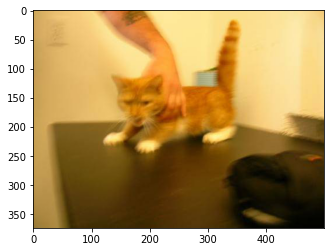

torch.Size([3, 374, 500])
0


In [ ]:
# и для примера отобразим элемент из тестовой выборки

image, label = next(iter(train_data))

plt.imshow(image.squeeze().numpy().transpose(1, 2, 0))
plt.show()
print(image.shape)
print(label)


Для создания собственного загрузчика датасета необходимо реализовать класс, который наследуется от класса `Dataset`  

Более того, в PyTorch имеют дело с двумя типами датасетов:
* map-style datasets -- в них соспоставляются 'ключи" и образцы данных. Каждый образец извлекается через метод `__get_item__()`, которого необходимо переопределить
* iterable-style datasets -- наборы данных, из которых извлечение происходит с помощью итератора (необходимо переопределить метод `__iter()__`)

In [ ]:
from torch.utils.data import Dataset
import random
 
class SampleDataset(Dataset):
  def __init__(self,r1,r2):
    randomlist=[]
    for i in range(1,1000):
      n = random.randint(r1,r2)
      randomlist.append(n)
    self.samples=randomlist
 
  def __len__(self):
      return len(self.samples)
 
  def __getitem__(self,idx):
      return(self.samples[idx])
 
dataset=SampleDataset(4,445)
dataset[100:120]

[122,
 102,
 70,
 279,
 84,
 223,
 130,
 176,
 102,
 302,
 395,
 185,
 56,
 366,
 169,
 120,
 406,
 322,
 91,
 197]

Выше уже неоднократно встречался объект `transforms` из модуля `torchvision.transforms`  
Этот модуль предоставляет набор инструментов для совершения различных преобразований над наборами данных (изображениями).

Ключевым является класс `transform.Compose`, объекты которого компонуют один или несколько типов преобразований воедино  

К основным тимпам преобразований можно причислить следующие:

* `transforms.ToTensor()` -- преобразование элементов данных (изображения в формате PIL или NumPy-массивы) в тензоры
* `transforms.Resize(shape)` -- изменение размерности
* `transforms.ToPIL()` -- преобразование тензора или NumPy-массива в PIL-изображение
* `transforms.RandomHorizontalFlip()` -- случайный переворот по горизонтали тензора или PIL-изображения
* `transforms.RandomVerticalFlip()` -- случайный переворот по вертикали тензора или PIL-изображения
* `transforms.RandomResizeCrop()` -- обрезка изображения (PIL или в виде тензора) произвольным образом
* `transforms.Grayscale()` -- перевод изображения в градации серого
* `transforms.Normalize(mean, std)` -- нормализация изображения с помощью среднего и стандартного отклонения. Принято использовать следующие значения: mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]


torch.Size([1, 100, 100])


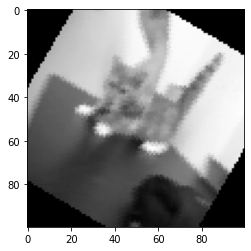

In [ ]:
# создадим объект transforms.Compose и поместим в него операции
#  - перевода изображения в градации серого
#  - ресайза до размера 100 на 100 пикселей
#  - случайного вращения  (до 50 градусов влево/вправо)
#  - перевода изображения в формат тензора

transform = transforms.Compose(
    [
     transforms.Grayscale(),
     transforms.Resize((100, 100)),
     transforms.RandomRotation(50),
     transforms.ToTensor()
    ]
)

# создадим новый объект ImageFolder
train_new = datasets.ImageFolder(train_path, transform=transform)

# создадим новый объект DataLoader
train_loader = DataLoader(train_new, batch_size=1, shuffle=True)

# извлечем пример преобразованного изображения и отобразим его
image, label = next(iter(train_new))
print(image.shape)
plt.imshow(image.squeeze().numpy(), cmap="gray")